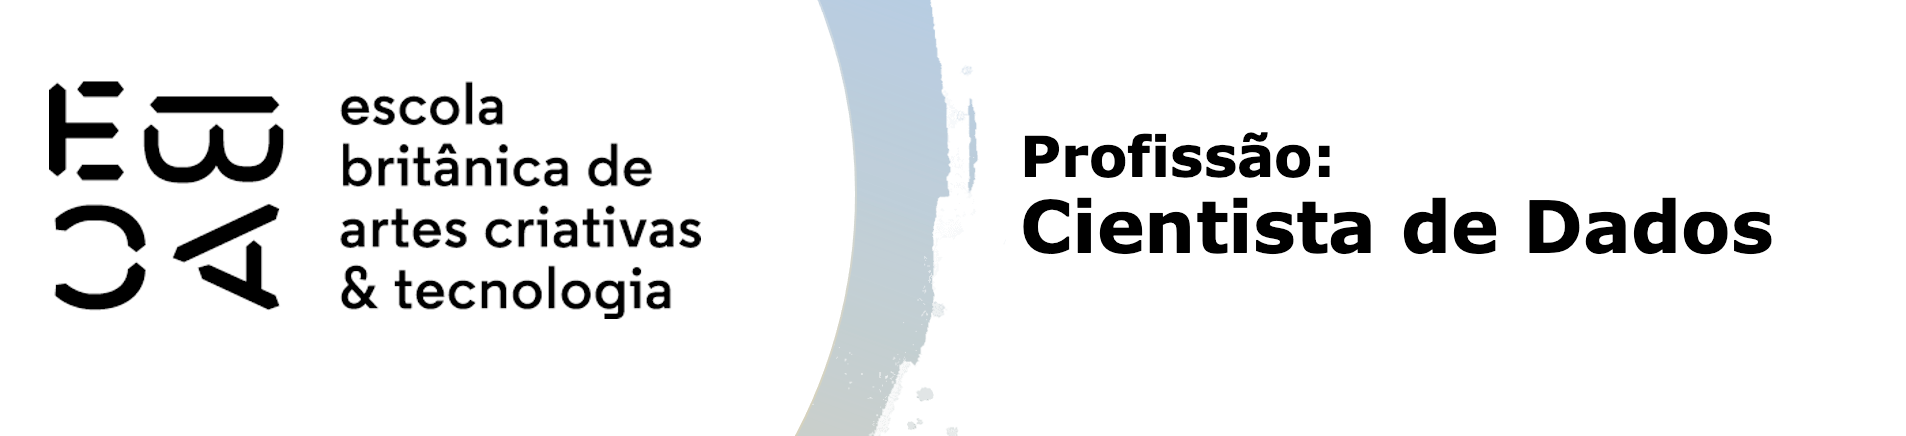

# Regressão III - Tarefa

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy                   as np

import statsmodels.api         as sm
import statsmodels.formula.api as smf

from scipy.interpolate         import interp1d

from sklearn.metrics           import r2_score

In [2]:
df = pd.read_csv('previsao_de_renda_II.csv', index_col=0)

df.info()

df

<class 'pandas.core.frame.DataFrame'>
Index: 750000 entries, 2015-01-01 to 2016-03-01
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   index                  750000 non-null  int64  
 1   sexo                   750000 non-null  object 
 2   posse_de_veiculo       750000 non-null  object 
 3   posse_de_imovel        750000 non-null  object 
 4   qtd_filhos             750000 non-null  int64  
 5   tipo_renda             750000 non-null  object 
 6   educacao               750000 non-null  object 
 7   estado_civil           750000 non-null  object 
 8   tipo_residencia        750000 non-null  object 
 9   idade                  750000 non-null  int64  
 10  tempo_emprego          624240 non-null  float64
 11  qt_pessoas_residencia  750000 non-null  float64
 12  renda                  750000 non-null  float64
dtypes: float64(3), int64(3), object(7)
memory usage: 80.1+ MB


,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
data_ref,,,,,,,,,,,,,
2015-01-01,5762,M,S,N,0,Empresário,Superior completo,Casado,Casa,47,16.717808,2.0,11138.14
2015-01-01,1279,M,S,N,0,Assalariado,Superior incompleto,Casado,Casa,30,9.600000,2.0,2424.81
2015-01-01,14111,M,S,N,0,Assalariado,Superior completo,Casado,Casa,28,8.208219,2.0,13749.66
2015-01-01,8189,M,N,S,2,Assalariado,Médio,Casado,Casa,44,1.301370,4.0,2361.84
2015-01-01,1830,F,N,S,2,Assalariado,Superior completo,Casado,Casa,33,1.254795,4.0,790.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-03-01,11611,F,N,S,1,Assalariado,Superior completo,Casado,Casa,29,8.665753,3.0,2930.40
2016-03-01,9144,F,N,S,0,Pensionista,Superior completo,Casado,Casa,65,NaN,2.0,4084.37
2016-03-01,16583,F,N,S,0,Assalariado,Superior completo,Casado,Casa,33,10.969863,2.0,4339.66


## Avalie valores missing e substitua pela média

Neste exercício não vamos nos preocupar com valores *missing*. Substitua-os pela média.

In [3]:
# Imprimindo a quantidade de valores ausentes para cada variável no DataFrame
print(f'Quantidade de valores missing por variável:\n\n{df.isna().sum()}')

Quantidade de valores missing por variável:

index                         0
sexo                          0
posse_de_veiculo              0
posse_de_imovel               0
qtd_filhos                    0
tipo_renda                    0
educacao                      0
estado_civil                  0
tipo_residencia               0
idade                         0
tempo_emprego            125760
qt_pessoas_residencia         0
renda                         0
dtype: int64


In [4]:
df['tempo_emprego'].fillna(df['tempo_emprego'].mean(), inplace=True)
df.isna().sum()

index                    0
sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
qt_pessoas_residencia    0
renda                    0
dtype: int64

### Base de testes

Separe os três últimos meses como base *holdout* (base de teste).

In [5]:
# Convertendo o índice do DataFrame para o tipo datetime
df.index = pd.to_datetime(df.index)

# Imprimindo os meses presentes na base de dados
print(f'''Meses presentes na base:
{[mes for mes in df.index.unique().strftime('%b%y')]}

Três últimos meses na base:
{[mes for mes in df[df.index > (df.index.unique().max() - pd.DateOffset(months=3))].index.unique().strftime('%b%y')]}
''')

Meses presentes na base:
['Jan15', 'Feb15', 'Mar15', 'Apr15', 'May15', 'Jun15', 'Jul15', 'Aug15', 'Sep15', 'Oct15', 'Nov15', 'Dec15', 'Jan16', 'Feb16', 'Mar16']

Três últimos meses na base:
['Jan16', 'Feb16', 'Mar16']



In [6]:
# Criando um DataFrame de holdout (df_holdout) contendo apenas os dados dos últimos três meses da base de dados original
df_holdout = df[df.index > (df.index.unique().max() - pd.DateOffset(months=3))].copy()

# Imprimindo os meses presentes na base de holdout (df_holdout)
print(f'''Base holdout (df_holdout):
{[mes for mes in df_holdout.index.unique().strftime('%b%y')]}
''')

# Exibindo o DataFrame de holdout
df_holdout

Base holdout (df_holdout):
['Jan16', 'Feb16', 'Mar16']



,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
data_ref,,,,,,,,,,,,,
2016-01-01,12946,F,N,S,0,Pensionista,Médio,Casado,Casa,61,7.746165,2.0,2137.61
2016-01-01,8872,F,N,S,2,Servidor público,Superior completo,Casado,Casa,27,9.301370,4.0,13884.35
2016-01-01,16279,F,S,S,3,Assalariado,Médio,Casado,Casa,38,10.967123,5.0,11042.47
2016-01-01,8158,M,S,S,3,Servidor público,Médio,Casado,Casa,35,5.553425,5.0,1333.82
2016-01-01,9356,F,S,N,0,Assalariado,Médio,Viúvo,Casa,63,9.265753,1.0,17633.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-03-01,11611,F,N,S,1,Assalariado,Superior completo,Casado,Casa,29,8.665753,3.0,2930.40
2016-03-01,9144,F,N,S,0,Pensionista,Superior completo,Casado,Casa,65,7.746165,2.0,4084.37
2016-03-01,16583,F,N,S,0,Assalariado,Superior completo,Casado,Casa,33,10.969863,2.0,4339.66


In [7]:
# Criando um DataFrame de treino (df_train) que contém os dados da base original excluindo os últimos três meses utilizados para o holdout
df_train = df[~df.index.isin(df_holdout.index)].copy()

# Imprimindo os meses presentes na base de treino (df_train)
print(f'''Base de treino (df_train):
{[mes for mes in df_train.index.unique().strftime('%b%y')]}
''')

# Exibindo o DataFrame de treino
df_train

Base de treino (df_train):
['Jan15', 'Feb15', 'Mar15', 'Apr15', 'May15', 'Jun15', 'Jul15', 'Aug15', 'Sep15', 'Oct15', 'Nov15', 'Dec15']



,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
data_ref,,,,,,,,,,,,,
2015-01-01,5762,M,S,N,0,Empresário,Superior completo,Casado,Casa,47,16.717808,2.0,11138.14
2015-01-01,1279,M,S,N,0,Assalariado,Superior incompleto,Casado,Casa,30,9.600000,2.0,2424.81
2015-01-01,14111,M,S,N,0,Assalariado,Superior completo,Casado,Casa,28,8.208219,2.0,13749.66
2015-01-01,8189,M,N,S,2,Assalariado,Médio,Casado,Casa,44,1.301370,4.0,2361.84
2015-01-01,1830,F,N,S,2,Assalariado,Superior completo,Casado,Casa,33,1.254795,4.0,790.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-01,4650,F,N,S,1,Assalariado,Superior incompleto,Solteiro,Casa,37,4.441096,2.0,1893.35
2015-12-01,9717,M,S,S,0,Empresário,Médio,Casado,Estúdio,44,2.345205,2.0,3080.48
2015-12-01,7485,M,S,S,0,Assalariado,Médio,Casado,Casa,28,0.736986,2.0,5131.20


### Primeiro modelo
 Não use *index* e não use a data. Avalie o modelo com o $R^2-ajustado$

In [8]:
# Ajustando um modelo de regressão linear simples utilizando a biblioteca StatsModels
modelo1 = smf.ols(formula='renda ~ tempo_emprego', 
                  data=df_train).fit()

# Imprimindo o R-quadrado ajustado do modelo
print(f'R-quadrado ajustado: {modelo1.rsquared_adj:.2%}')

# Exibindo um resumo do modelo
modelo1.summary()

R-quadrado ajustado: 23.58%


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                 1.851e+05
Date:                Wed, 24 Jul 2024   Prob (F-statistic):               0.00
Time:                        18:46:52   Log-Likelihood:            -7.6780e+06
No. Observations:              600000   AIC:                         1.536e+07
Df Residuals:                  599998   BIC:                         1.536e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3.356e+04    182.314   -184.055      0.000   -3.39e+04   -3.32e+04
tempo_emprego  7957.6772     18.494    430.278      0.000    7921.429    7993.925
==============================================================================
Omnibus:                  1425439.625   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      28550038647.681
Skew:                          24.009   Prob(JB):                         0.00
Kurtosis:                    1070.565   Cond. No.                         16.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Análise de perfil

Categorize a variável ```tempo_emprego``` em 20 quantis (cada categoria deve ter aproximadamente a mesma quantidade de observações) e faça uma tabela de perfil (armazene como dataframe) para esta categorização:

- Cada linha é uma categoria
- Uma coluna para a quantidade de observações de cada categoria
- Uma coluna para a média do log-renda para cada categoria
- Uma coluna para a média do tempo de emprego para cada categoria

Faça um gráfico da média do tempo de emprego pela média do log-renda. Insira uma célula de texto e comente se te parece que alguma das transformações vistas no módulo deve fornecer bons resultados.

In [9]:
# Definindo o número inicial de quantis desejados
n_quantis = 20

# Inicializando a variável de quantis
quantis = n_quantis

# Enquanto o número de intervalos únicos dos quantis calculados for menor que o número desejado, aumenta-se o número de quantis
while pd.qcut(x=df_train['tempo_emprego'], q=quantis, duplicates='drop').nunique() < n_quantis:
    quantis += 1

# Criando uma nova coluna 'cat_tempo_emprego' que representa os intervalos de quantis para a variável 'tempo_emprego'
df_train['cat_tempo_emprego'] = pd.qcut(x=df_train['tempo_emprego'], q=quantis, duplicates='drop', precision=0)

# Calculando estatísticas resumidas para cada grupo de 'cat_tempo_emprego'
df_cat = (df_train
          .groupby(by='cat_tempo_emprego')
          .agg({'cat_tempo_emprego': [('Quantidade de observações', 'count')], 
                'renda': [('Média da renda', 'mean')], 
                'tempo_emprego': [('Média do tempo de emprego', 'mean')]})
          .droplevel(level=0, axis=1))

# Exibindo as estatísticas resumidas
df_cat

,Quantidade de observações,Média da renda,Média do tempo de emprego
cat_tempo_emprego,,,
"(0.0, 0.7]",26142,6459.375198,0.473562
"(0.7, 1.3]",26854,7109.652010,1.008970
"(1.3, 1.8]",25393,7761.831953,1.572611
"(1.8, 2.5]",26124,8391.401985,2.152715
"(2.5, 3.2]",26012,9193.749354,2.855294
"(3.2, 3.8]",26090,9987.006846,3.495145
"(3.8, 4.4]",26065,11055.595264,4.085275
"(4.4, 4.9]",26037,11563.547962,4.621024
"(4.9, 5.6]",26252,12896.192469,5.278286


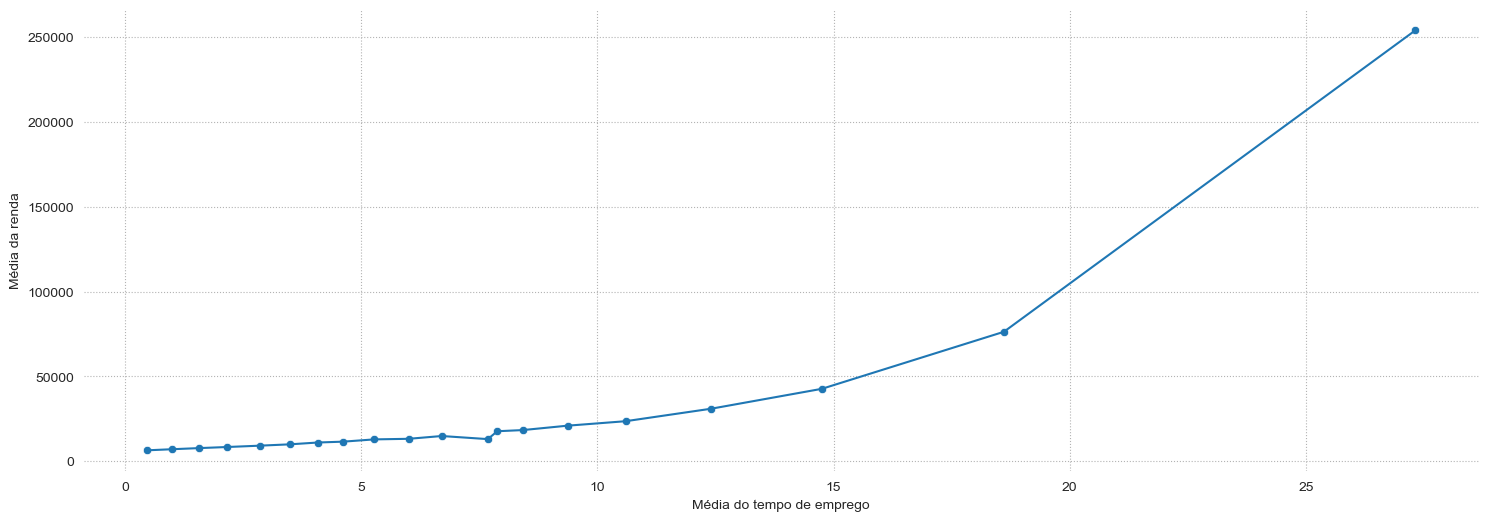

In [10]:
# Configurando o estilo do gráfico com grade branca e estilo de linha pontilhada
sns.set_style("whitegrid", {"grid.color": '.7', "grid.linestyle": ':'})

# Criando uma figura com o tamanho especificado
plt.figure(figsize=(18,6))

# Plotando o gráfico de dispersão
sns.scatterplot(x='Média do tempo de emprego', y='Média da renda', data=df_cat)

# Adicionando uma linha de tendência ao gráfico
sns.lineplot(x='Média do tempo de emprego', y='Média da renda', data=df_cat)

# Removendo as linhas de grade à esquerda e na parte inferior do gráfico
sns.despine(left=True, bottom=True)

# Exibindo o gráfico
plt.show()

### Linearização

Experimente pelo menos duas técnicas de linearização vistas ao longo do módulo para melhorar o ajuste da variável ```tempo_emprego```. Compare o $R^2-ajustado$ e avalie se alguma delas apresentou resultados relevantes com relação ao primeiro modelo.


In [11]:
# Adicionando uma nova coluna 'renda_log' com o logaritmo natural dos valores da coluna 'renda'
df_train['renda_log'] = np.log(df_train['renda'])

# Criando uma nova coluna 'cat_renda' no DataFrame de treino, contendo os dados da variável 'renda' divididos em categorias com base nos quantis
df_train['cat_renda'], retbins = pd.qcut(x=df_train.renda, q=20, retbins=True, precision=0)

# Imprimindo o número de categorias únicas criadas para 'cat_renda'
print(f'''Quantidade de categorias para 'cat_renda': {df_train.cat_renda.nunique()}''')

# Exibindo o DataFrame de treino atualizado
df_train

Quantidade de categorias para 'cat_renda': 20


,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,cat_tempo_emprego,renda_log,cat_renda
data_ref,,,,,,,,,,,,,,,,
2015-01-01,5762,M,S,N,0,Empresário,Superior completo,Casado,Casa,47,16.717808,2.0,11138.14,"(16.0, 21.2]",9.318131,"(9966.0, 11497.0]"
2015-01-01,1279,M,S,N,0,Assalariado,Superior incompleto,Casado,Casa,30,9.600000,2.0,2424.81,"(8.9, 10.0]",7.793508,"(1689.0, 2449.0]"
2015-01-01,14111,M,S,N,0,Assalariado,Superior completo,Casado,Casa,28,8.208219,2.0,13749.66,"(8.0, 8.9]",9.528769,"(13339.0, 15536.0]"
2015-01-01,8189,M,N,S,2,Assalariado,Médio,Casado,Casa,44,1.301370,4.0,2361.84,"(1.3, 1.8]",7.767196,"(1689.0, 2449.0]"
2015-01-01,1830,F,N,S,2,Assalariado,Superior completo,Casado,Casa,33,1.254795,4.0,790.78,"(0.7, 1.3]",6.673020,"(140.0, 1689.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-01,4650,F,N,S,1,Assalariado,Superior incompleto,Solteiro,Casa,37,4.441096,2.0,1893.35,"(4.4, 4.9]",7.546103,"(1689.0, 2449.0]"
2015-12-01,9717,M,S,S,0,Empresário,Médio,Casado,Estúdio,44,2.345205,2.0,3080.48,"(1.8, 2.5]",8.032841,"(2449.0, 3163.0]"
2015-12-01,7485,M,S,S,0,Assalariado,Médio,Casado,Casa,28,0.736986,2.0,5131.20,"(0.0, 0.7]",8.543095,"(4671.0, 5519.0]"


In [12]:
# Criando um novo DataFrame df_cat2 com estatísticas resumidas para cada categoria da variável 'cat_renda'
df_cat2 = (df_train
           .groupby(by='cat_renda')
           .agg({'cat_renda':[('Quantidade de observações', 'count')], 
                 'tempo_emprego': [('Média do tempo de emprego', 'mean')], 
                 'renda_log': [('Média do renda_log', 'mean')]})
           .droplevel(level=0, axis=1))

# Exibindo o DataFrame df_cat2
df_cat2

,Quantidade de observações,Média do tempo de emprego,Média do renda_log
cat_renda,,,
"(140.0, 1689.0]",30000,3.495999,7.010163
"(1689.0, 2449.0]",30003,4.207643,7.632577
"(2449.0, 3163.0]",29998,4.660527,7.936228
"(3163.0, 3891.0]",30004,4.918947,8.165258
"(3891.0, 4671.0]",30002,5.252237,8.359802
"(4671.0, 5519.0]",29998,5.379107,8.533222
"(5519.0, 6458.0]",29998,5.643284,8.695236
"(6458.0, 7488.0]",29999,5.842475,8.846803
"(7488.0, 8648.0]",29998,6.083964,8.992746


In [13]:
# Preenchendo os valores ausentes da coluna 'tempo_emprego' no DataFrame de treino com a média do tempo de emprego correspondente à categoria da variável 'cat_renda'
df_train['tempo_emprego_fillna'] = (df_train['tempo_emprego']
                                      .fillna(value=df_train.merge(right=df_cat2, 
                                                                   how='left', 
                                                                   left_on='cat_renda', 
                                                                   right_index=True)['Média do tempo de emprego']))

# Exibindo o DataFrame de treino atualizado
df_train

,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,cat_tempo_emprego,renda_log,cat_renda,tempo_emprego_fillna
data_ref,,,,,,,,,,,,,,,,,
2015-01-01,5762,M,S,N,0,Empresário,Superior completo,Casado,Casa,47,16.717808,2.0,11138.14,"(16.0, 21.2]",9.318131,"(9966.0, 11497.0]",16.717808
2015-01-01,1279,M,S,N,0,Assalariado,Superior incompleto,Casado,Casa,30,9.600000,2.0,2424.81,"(8.9, 10.0]",7.793508,"(1689.0, 2449.0]",9.600000
2015-01-01,14111,M,S,N,0,Assalariado,Superior completo,Casado,Casa,28,8.208219,2.0,13749.66,"(8.0, 8.9]",9.528769,"(13339.0, 15536.0]",8.208219
2015-01-01,8189,M,N,S,2,Assalariado,Médio,Casado,Casa,44,1.301370,4.0,2361.84,"(1.3, 1.8]",7.767196,"(1689.0, 2449.0]",1.301370
2015-01-01,1830,F,N,S,2,Assalariado,Superior completo,Casado,Casa,33,1.254795,4.0,790.78,"(0.7, 1.3]",6.673020,"(140.0, 1689.0]",1.254795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-01,4650,F,N,S,1,Assalariado,Superior incompleto,Solteiro,Casa,37,4.441096,2.0,1893.35,"(4.4, 4.9]",7.546103,"(1689.0, 2449.0]",4.441096
2015-12-01,9717,M,S,S,0,Empresário,Médio,Casado,Estúdio,44,2.345205,2.0,3080.48,"(1.8, 2.5]",8.032841,"(2449.0, 3163.0]",2.345205
2015-12-01,7485,M,S,S,0,Assalariado,Médio,Casado,Casa,28,0.736986,2.0,5131.20,"(0.0, 0.7]",8.543095,"(4671.0, 5519.0]",0.736986


In [14]:
# Ajustando um novo modelo de regressão linear utilizando a variável 'tempo_emprego_fillna' como preditor da variável 'renda_log' no DataFrame de treino
modelo2 = smf.ols(formula='renda_log ~ tempo_emprego_fillna', data=df_train).fit()

# Imprimindo o R-quadrado ajustado dos dois modelos
print(f'R-quadrado ajustado (modelo1): {modelo1.rsquared_adj:.2%}') 
print(f'R-quadrado ajustado (modelo2): {modelo2.rsquared_adj:.2%}') 

# Exibindo um resumo do segundo modelo
modelo2.summary()

R-quadrado ajustado (modelo1): 23.58%
R-quadrado ajustado (modelo2): 41.74%


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              renda_log   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                 4.298e+05
Date:                Wed, 24 Jul 2024   Prob (F-statistic):               0.00
Time:                        18:48:21   Log-Likelihood:            -8.0817e+05
No. Observations:              600000   AIC:                         1.616e+06
Df Residuals:                  599998   BIC:                         1.616e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                8.2780      0.002   4262.716      0.000       8.274       8.282
tempo_emprego_fillna     0.1292      0.000    655.629      0.000       0.129       0.130
==============================================================================
Omnibus:                      798.953   Durbin-Watson:                   1.265
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              717.227
Skew:                          -0.046   Prob(JB):                    1.80e-156
Kurtosis:                       2.857   Cond. No.                         16.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Avaliando o modelo

Avalie os resultados dos modelos construidos na base de testes.

In [15]:
# Ajustando um terceiro modelo de regressão linear utilizando os dados resumidos do DataFrame df_cat2
modelo3 = smf.ols(formula='Q("Média do renda_log") ~ Q("Média do tempo de emprego")', data=df_cat2).fit()

# Imprimindo o R-quadrado ajustado dos três modelos
print(f'R-quadrado ajustado (modelo1): {modelo1.rsquared_adj:.2%}') 
print(f'R-quadrado ajustado (modelo2): {modelo2.rsquared_adj:.2%}') 
print(f'R-quadrado ajustado (modelo3): {modelo3.rsquared_adj:.2%}') 

# Exibindo um resumo do terceiro modelo
modelo3.summary()

R-quadrado ajustado (modelo1): 23.58%
R-quadrado ajustado (modelo2): 41.74%
R-quadrado ajustado (modelo3): 81.15%


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Q("Média do renda_log")   R-squared:                       0.821
Model:                                 OLS   Adj. R-squared:                  0.811
Method:                      Least Squares   F-statistic:                     82.77
Date:                     Wed, 24 Jul 2024   Prob (F-statistic):           3.75e-08
Time:                             18:48:25   Log-Likelihood:                -14.878
No. Observations:                       20   AIC:                             33.76
Df Residuals:                           18   BIC:                             35.75
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          7.2806      0.250     29.094      0.000       6.755       7.806
Q("Média do tempo de emprego")     0.2579      0.028      9.098      0.000       0.198       0.318
==============================================================================
Omnibus:                        3.179   Durbin-Watson:                   0.314
Prob(Omnibus):                  0.204   Jarque-Bera (JB):                2.489
Skew:                          -0.843   Prob(JB):                        0.288
Kurtosis:                       2.620   Cond. No.                         18.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
# Combinando os resultados do modelo de regressão linear (modelo3) com as estatísticas resumidas do DataFrame df_cat2
df_modelo3 = (df_cat2
              .merge(right=modelo3.get_prediction().summary_frame(), 
                     on='cat_renda')
              .rename(columns={'Quantidade de observações':'qtd', 
                               'Média do tempo de emprego':'tempo_emprego', 
                               'Média do renda_log':'renda_log'}))

# Exibindo o DataFrame df_modelo3
df_modelo3

,qtd,tempo_emprego,renda_log,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
cat_renda,,,,,,,,,
"(140.0, 1689.0]",30000,3.495999,7.010163,8.182322,0.170048,7.825064,8.539579,6.999542,9.365102
"(1689.0, 2449.0]",30003,4.207643,7.632577,8.365881,0.156403,8.037291,8.694472,7.191442,9.540321
"(2449.0, 3163.0]",29998,4.660527,7.936228,8.482697,0.148496,8.170719,8.794675,7.312797,9.652597
"(3163.0, 3891.0]",30004,4.918947,8.165258,8.549354,0.144302,8.246186,8.852521,7.381772,9.716935
"(3891.0, 4671.0]",30002,5.252237,8.359802,8.635322,0.139277,8.342712,8.927931,7.470437,9.800206
"(4671.0, 5519.0]",29998,5.379107,8.533222,8.668046,0.137486,8.379199,8.956894,7.504101,9.831991
"(5519.0, 6458.0]",29998,5.643284,8.695236,8.736187,0.133991,8.454683,9.017692,7.574043,9.898332
"(6458.0, 7488.0]",29999,5.842475,8.846803,8.787566,0.131576,8.511135,9.063997,7.626640,9.948493
"(7488.0, 8648.0]",29998,6.083964,8.992746,8.849855,0.128920,8.579004,9.120707,7.690245,10.009466


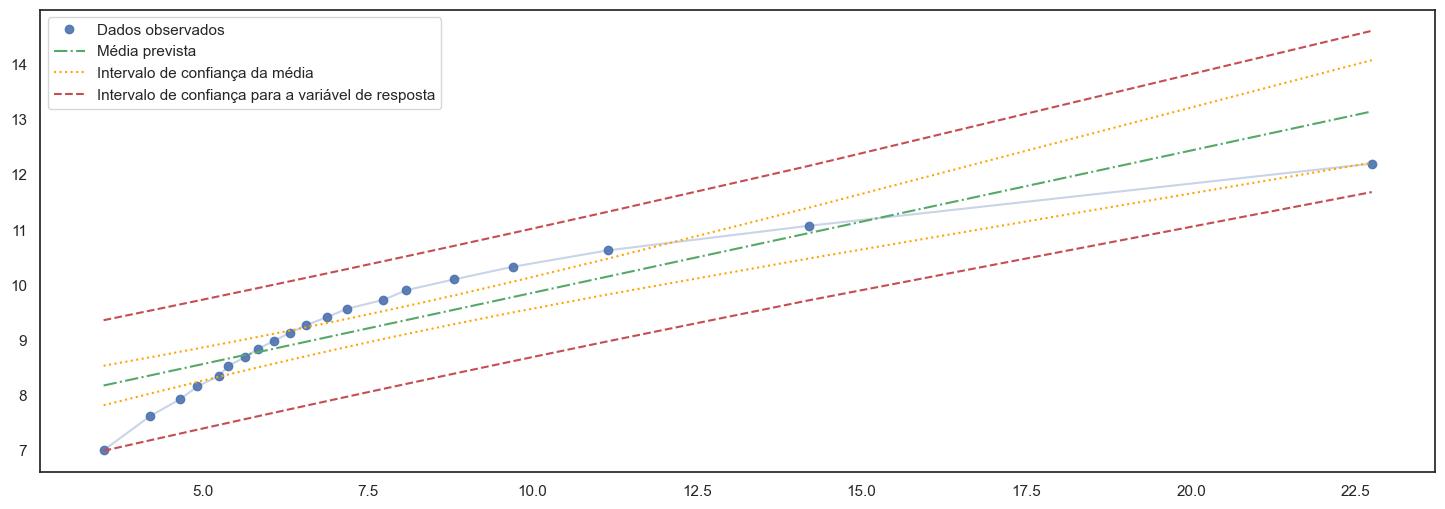

In [17]:
# Criando uma função para plotar os resultados de um modelo de regressão
def plotar_resultados_regressao(data: pd.DataFrame) -> None:
    """
    Plota os dados observados, a média prevista e os intervalos de confiança de um modelo de regressão.

    Parâmetros:
        data (pd.DataFrame): DataFrame contendo os resultados da regressão.

    Retorna:
        None
    """
    # Criação do gráfico para exibir os resultados do modelo de regressão linear
    plt.figure(figsize=(18, 6))

    # Configurando o estilo do gráfico
    sns.set_theme(style='white')

    # Plotando os dados observados
    plt.plot(data['tempo_emprego'], data['renda_log'], 'bo', alpha=.9, label='Dados observados')
    
    # Plotando uma linha conectando os dados observados
    plt.plot(data['tempo_emprego'], data['renda_log'], '-', alpha=.3)

    # Plotando a média prevista
    plt.plot(data['tempo_emprego'], data['mean'], 'g-.', label='Média prevista')

    # Plotando o intervalo de confiança da média
    plt.plot(data['tempo_emprego'], data['mean_ci_lower'], ':', color='orange', label='Intervalo de confiança da média')
    plt.plot(data['tempo_emprego'], data['mean_ci_upper'], ':', color='orange')

    # Plotando o intervalo de confiança para a variável de resposta
    plt.plot(data['tempo_emprego'], data['obs_ci_lower'], 'r--', label='Intervalo de confiança para a variável de resposta')
    plt.plot(data['tempo_emprego'], data['obs_ci_upper'], 'r--')

    # Adicionando legenda
    plt.legend(loc='best')

    # Exibindo o gráfico
    plt.show()

# Chamando a função para exibir o gráfico com os resultados do modelo de regressão linear (modelo3)
plotar_resultados_regressao(data=df_modelo3)